In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from clean_table import import_clean_licences_2012
import dictionnaire_sport

%matplotlib inline
path = "/home/colinfrisch/Documents/Colin/licences_2012.csv"
t_licences = import_clean_licences_2012(path)

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "
/home/colinfrisch/Documents/Colin/git/clean_table.py:35: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  t_licences.loc[:, t_licences.columns.isin(starts_with_pop)].convert_objects(convert_numeric=True)


C'est ici le nécessaire pour importer plusieurs librairies qui vont me faciliter la tâche pour la collecte des données.

### LUNDI 13 JUIN


#### Ce que j’ai vu :

Etalab est un service informatique de l’Etat situé dans une tour au bord de la seine (15ème arrondissement). À l’entrée de la tour, des secretaires travaillent pour accueillir les employés et visiteurs. Cette tour est très moderne : cafétaria, cantine, méga-ascenseurs… tout y est. Mon endroit de travail se situe au quatrième étage où s’y situent une grande quantitée de bureaux ayant tous une vue sur l’extérieur. Chaques bureaux peuvent contenir en moyenne une quinzaine de personne. Chaque personne y resident est équipée d’un ordinateur car le travail à faire est essentiellement informatique.


#### Ce que j’ai fait :

Mon maître de stage m’a fait programmer un ordinateur avec un langage informatique nommé le python pour chercher, trouver et classer des données, ici sur le sport. En tout premier j’ai trouvé en cherchant avec un programme dans les données de l’Etat quels étaient les cinquante sports les plus pratiqués en France (le premier s’avérait être le football). J’ai ensuite cherché combien de personnes pratiquaient le taekwondo, où étaient les villes où ce sport était le plus présent mais aussi la commune contenant le plus de personnes pratiquant le taekwondo par rapport a la population totale. J’ai participé ensuite à une petite réunion concernant un projet actuel d’Etalab.


In [4]:
t_licences.loc("fed_2012_libelles")[t_licences["fed_2012"] == 103].head()

,LIBELLE,fed_2012,l_2012,l_0_4_2012,l_5_9_2012,l_10_14_2012,l_15_19_2012,l_20_29_2012,l_30_44_2012,l_45_59_2012,...,l_h_2012_ratio,l_0_4_h_2012_ratio,l_5_9_h_2012_ratio,l_10_14_h_2012_ratio,l_15_19_h_2012_ratio,l_20_29_h_2012_ratio,l_30_44_h_2012_ratio,l_45_59_h_2012_ratio,l_60_74_h_2012_ratio,l_75_99_h_2012_ratio
1,ABERGEMENT-CLEMENCIAT,103,4,0,2,0,0,0,1,1,...,0.009950,0.0,0.055556,0.000000,0.000000,0.000000,0.011364,0.013158,0.000000,0.0
50,AMBERIEU-EN-BUGEY,103,71,0,5,16,11,19,16,2,...,0.006354,0.0,0.008230,0.020101,0.018450,0.009395,0.006329,0.000778,0.002488,0.0
158,AMBRONAY,103,10,0,1,1,0,4,3,1,...,0.005222,0.0,0.010417,0.019231,0.000000,0.028302,0.003704,0.000000,0.000000,0.0
208,AMBUTRIX,103,6,0,0,2,1,1,2,0,...,0.005181,0.0,0.000000,0.027778,0.032258,0.000000,0.000000,0.000000,0.000000,0.0
242,ANDERT-ET-CONDON,103,1,0,0,1,0,0,0,0,...,0.006410,0.0,0.000000,inf,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


Je fais ici en sorte de ne voir que les 5 premières communes (dans l'ordre alphabetique) qui ont des données sur le taekwondo. Il y a dans ce tableau toutes les informations que l'Etat detient sur les licences de teakwondo en 2012 : âge (de quel âge a quel âge), sexe, commune de résidense...

##### sports les plus pratiqués en france.

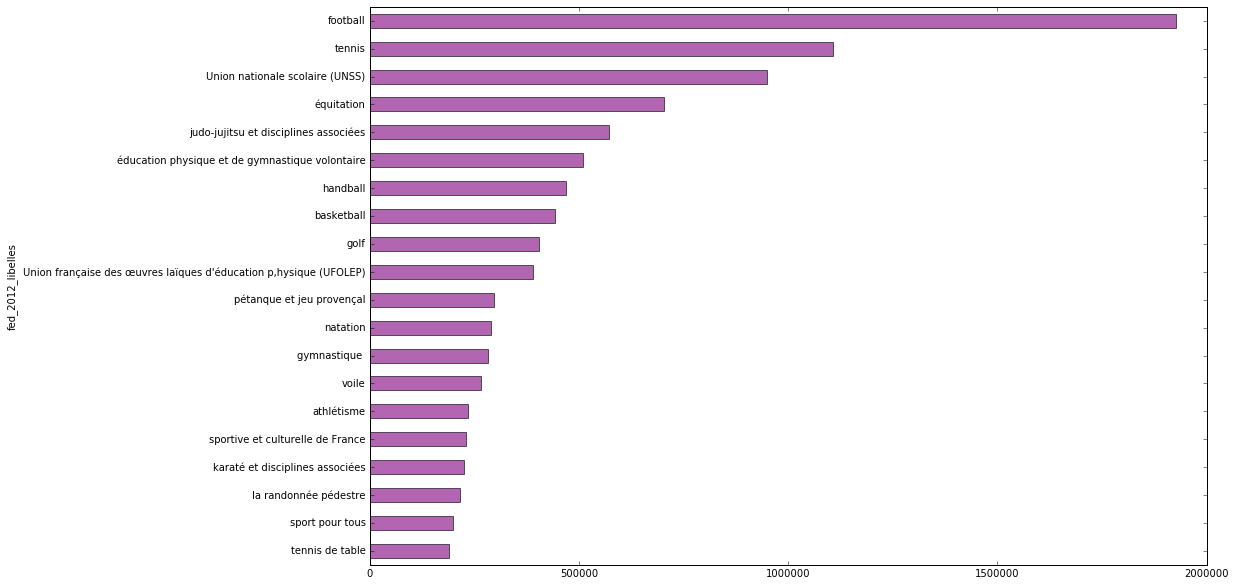

In [3]:
t_licences.groupby("fed_2012_libelles")["l_2012"].sum().sort_values(ascending=False).head(20).plot(figsize=(15, 10),
                                                                                                   kind='barh',
                                                                                                   color="purple",
                                                                                                    alpha=0.6)
plt.gca().invert_yaxis()

J'ai pu voir grâce à ce graphique que le sport le plus pratiqué en france (avec license) est le football. Mais j'ai aussi pu étudier les 20 suivants grâce à une commande : je peux faire varier le nombre de résultats que je veux.

##### Communes les plus pratiquantes de taekwondo par rapport au nombre d'habitants

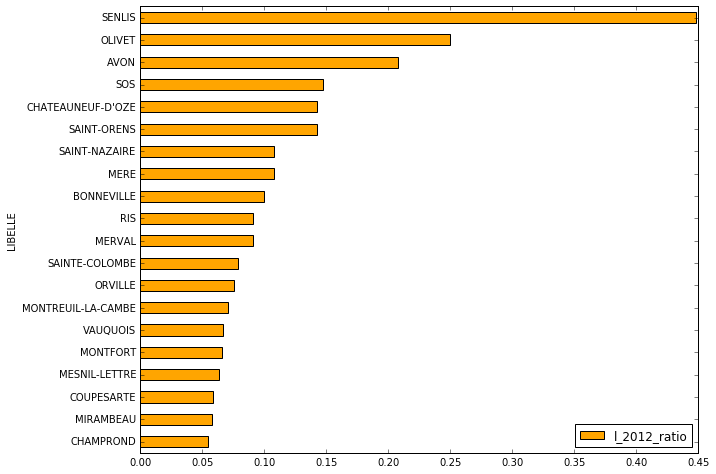

In [5]:
communes_taekwondo = t_licences.loc[t_licences["fed_2012"] == 103][['LIBELLE', 'l_2012_ratio']].sort_values(by="l_2012_ratio", ascending=False)


communes_taekwondo.head(20).plot(x="LIBELLE", y="l_2012_ratio", kind='barh', color='orange', figsize=(10, 8))
plt.gca().invert_yaxis()


In [6]:
t_licences.loc[(t_licences["fed_2012"] == 103) & (t_licences["LIBELLE"] == "SENLIS")][["LIBELLE",
                                                                                       "fed_2012",
                                                                                       "l_2012",
                                                                                       "pop_2010"]]

,LIBELLE,fed_2012,l_2012,pop_2010
543430,SENLIS,103,78,174.0


In [7]:
t_licences.loc[(t_licences["fed_2012"] == 103) & (t_licences["LIBELLE"] == "PARIS")][["LIBELLE",
                                                                                       "fed_2012",
                                                                                       "l_2012",
                                                                                       "pop_2010"]]

,LIBELLE,fed_2012,l_2012,pop_2010
662595,PARIS,103,3214,2243718.0


J'ai aussi pu déduire de ce graphique les communes les plus pratiquantes de taekwondo proportionellement au nombre d'habitants. J'ai ensuite fait des recherches sur Senlis (avec la proportionnalité par rapport au nombre d'habitants) puis sur Paris (non proportionnel) en ordonnant au programme de nommer la commune, le numéro de licence de taekwondo, le nombre de personnes licenciés et la population total.



#### Ce que j’ai appris :

- J’ai appris comment me servir d’un langage de programmation pour collecter et concrêtiser un jeu de données à partir de données
- J’ai appris à me servir d’un site web fourni par Etalab pour récolter les données necessaires à un travail
- J’ai appris à faire des graphiques comprenant des données récoletés sur un fichier avec un langage de programmation informatique.

### MARDI 14 JUIN


#### Ce que j’ai fait :

J’ai continué a utiliser de la programmation en continuant a me donner des defis toujours plus difficile et à remplir ceux que me donnait mon maître de stage. J’ai utilisé encore plus de différentes données de l’Etat pour faire encore une fois des petites études et articles. Par exemple, j’ai regroupé les données montrant les sports préférés des gens de moins de 18 ans en général, le sport préféré des personnes de plus de quarante ans (voir le graphique ci dessous) et ai mis à jour et amélioré quelques autres études que j’avais fait hier.


#### Ce que j'ai vu
J’ai aujourd’hui fait la connaissance de la directrice d’Etalab : Laure Lucchesi et aussi du directeur du SGmap, un service encore au dessus de celui d’Etalab. L'ambiance est très bonne tout le monde n’hesite pas à venire en aide à ceux qui en ont besoin. J’en conclus donc qu’étant donné que ce lieu de travail est très sympathique, avoir une aptitude respectueuse et gentille a de grande repercussions sur l’efficacité de travail des autres .


##### Communes les plus pratiquantes de boxe par rapport au nombre d'habitants

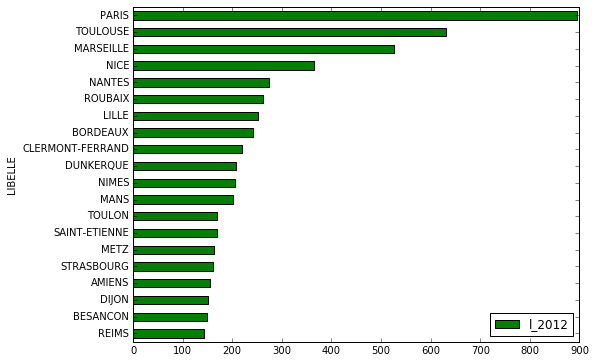

In [10]:
communes_boxe = t_licences.loc[t_licences["fed_2012"] == 106][['LIBELLE', 'l_2012']].sort_values(by="l_2012", ascending=False)


communes_boxe.head(20).plot(x="LIBELLE", y="l_2012", kind='barh', color='green', figsize=(8, 6))
plt.gca().invert_yaxis()

J'ai refait la même chose que le taekwondo pour la boxe non proportionellement...

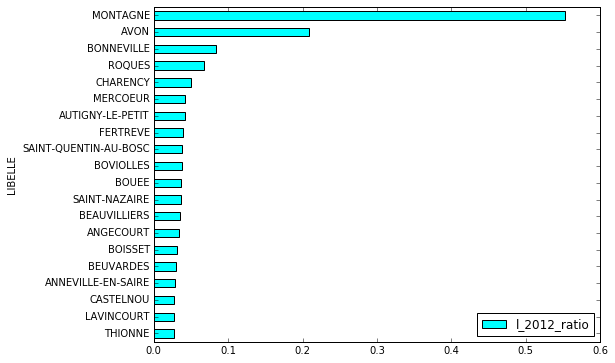

In [11]:
communes_boxe= t_licences.loc[t_licences["fed_2012"] == 106][['LIBELLE', 'l_2012_ratio']].sort_values(by="l_2012_ratio", ascending=False)


communes_boxe.head(20).plot(x="LIBELLE", y="l_2012_ratio", kind='barh', color='cyan', figsize=(8, 6))
plt.gca().invert_yaxis()

... puis proportionellement au nombre d'habitant dans la commune.

##### Sport préféré des personnes de plus de 40 ans.

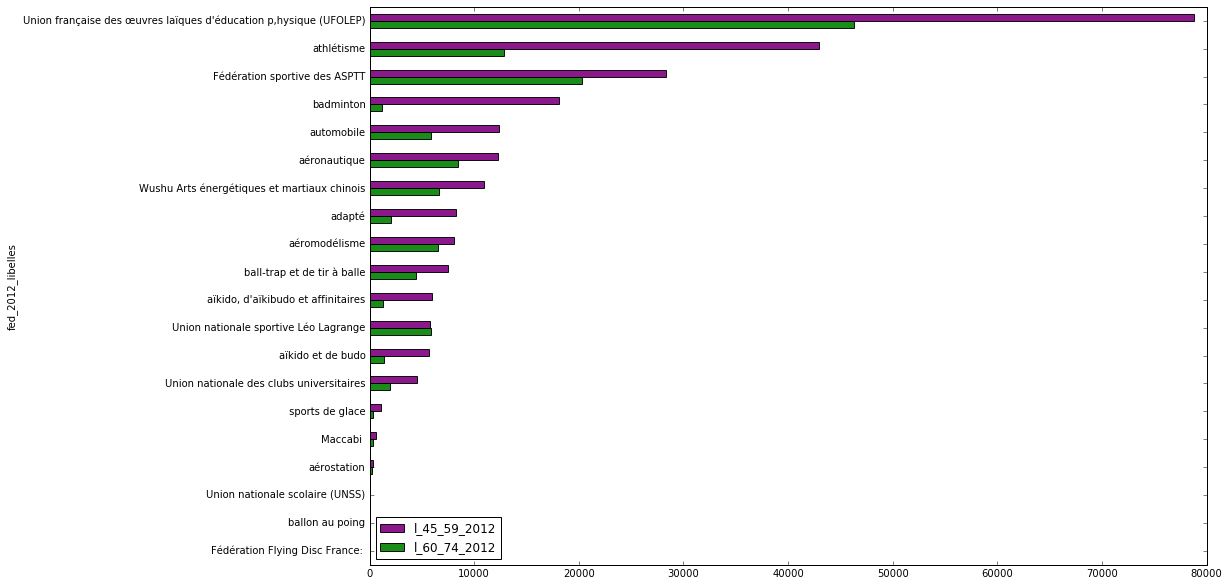

In [12]:
t_licences.groupby("fed_2012_libelles")[["l_45_59_2012","l_60_74_2012"]].sum().head(20).sort_values(by=["l_45_59_2012",
                                                                                                        "l_60_74_2012" ], ascending=False).plot(figsize=(15, 10),
                                                                                                                                                kind='barh',
                                                                                                                                                color=["purple","green"],
                                                                                                                                               alpha=0.9)
plt.gca().invert_yaxis()

#### ce que j’ai appris :

- J’ai appris à approfondir mes graphiques en leur mettant deux (ou plus) colonnes de valeurs
- J’ai appris que la vie en entreprise est beaucoup plus agéable pour tout le monde si chacun fait un effort de vonlonté pour aider les autres


### MERCREDI 15 JUIN

#### ce que j'ai fait :
J’ai continué à faire des graphiques et des études de plus en plus compliqué, j’ai aussi commencé à exporter mon travail sur un site web permettant de partager le contenu de mes projets ou alors même de travailler à plusieurs sur le même projet. C’est à a partir de ce site web que j’ai édité et illustré de tous ces codes et graphiques mon rapport de stage.
J’ai aussi fait l’interview de mon maitre de stage Florian Gauthier. Cet interview m'a appris beaucoup de choses sur l’entreprise.


##### Les sports les plus féminisés :

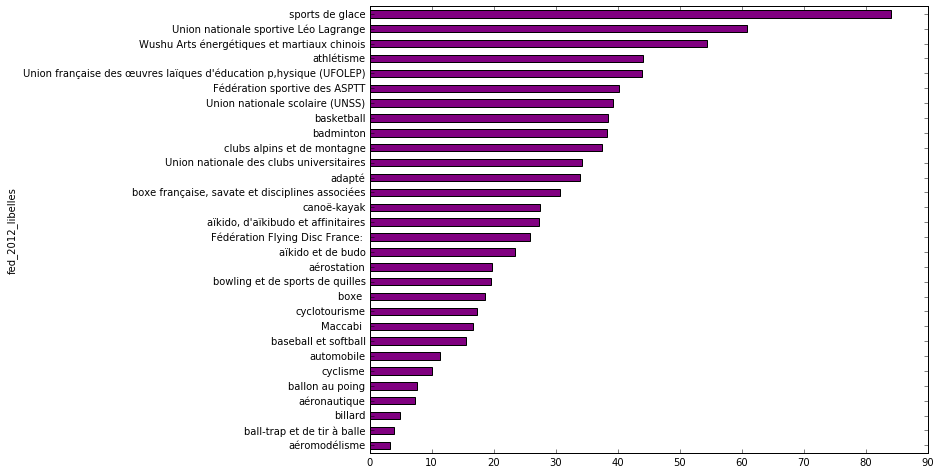

In [13]:
t_prop = t_licences.groupby("fed_2012_libelles")["l_f_2012"].sum()/t_licences.groupby("fed_2012_libelles")["l_2012"].sum()


result = t_prop.head(30).sort_values(ascending = False)*100
result.plot(figsize=(10, 8),
                                                        kind='barh',
                                                        color="purple",
                                                        y="t_prop")
plt.gca().invert_yaxis()

J'ai cherché ici la proportion de licences féminines dans les sports pratiqués essentiellement par des femmes. Ce sont les sports de glace.

In [14]:
t_prop = t_licences.groupby("fed_2012_libelles")["l_f_2012"].sum()/t_licences.groupby("fed_2012_libelles")["l_2012"].sum()


t_prop.head(20).sort_values(ascending = False)*100

fed_2012_libelles
 sports de glace                                                     84.141891
Union nationale sportive Léo Lagrange                                60.916200
Wushu Arts énergétiques et martiaux chinois                          54.385414
athlétisme                                                           44.042502
Union française des œuvres laïques d'éducation p,hysique (UFOLEP)    43.921528
Fédération sportive des ASPTT                                        40.160424
Union nationale scolaire (UNSS)                                      39.295445
badminton                                                            38.303622
Union nationale des clubs universitaires                             34.283031
adapté                                                               33.934153
aïkido, d'aïkibudo et affinitaires                                   27.241202
Fédération Flying Disc France:                                       25.897761
aïkido et de budo                 

C'est ici la même chose que le graphique ci dessus mais en tableau.